In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os, random

print(tf.__version__)
print(sys.executable)

BATCH_SIZE = 32
IMG_SIZE = (300, 300)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2.4.0
C:\Users\leeh9\anaconda3\envs\ugrp_3\python.exe
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16429934801885904740
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1408043827
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5512192784350432220
physical_device_desc: "device: 0, name: GeForce MX250, pci bus id: 0000:3a:00.0, compute capability: 6.1"
]


In [35]:
TARGET_PATH = lambda x : f'MLP\\{x}'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(TARGET_PATH("train"),
                                                                    shuffle=True,
                                                                    batch_size=BATCH_SIZE,
                                                                    image_size=IMG_SIZE)

eval_dataset = tf.keras.preprocessing.image_dataset_from_directory(TARGET_PATH("evaluation"),
                                                                    shuffle=True,
                                                                    batch_size=BATCH_SIZE,
                                                                    image_size=IMG_SIZE)

test_dataset = eval_dataset.take(val_batches // 2)
validation_dataset = eval_dataset.skip(val_batches // 2)

# Rescal pixel value between [0, 255] to [-1, 1]
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1. / 127.5, offset=-1)
IMG_SHAPE = IMG_SIZE + (3,)

Found 1557 files belonging to 2 classes.
Found 807 files belonging to 2 classes.


In [10]:
n_input = 20
n_hidden_1 = 20
n_hidden_2 = 20
n_hidden_3 = 20
n_hidden_4 = 20
n_hidden_5 = 20
n_hidden_6 = 20
n_output = 1

base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE, include_top=False)
base_model.trainable = False

MPL_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=n_hidden_1), # dense는 activation 주로 안 씀 
    tf.keras.layers.Dense(units=n_hidden_2),
    tf.keras.layers.Dense(units=n_hidden_3),
    tf.keras.layers.Dense(units=n_hidden_4),
    tf.keras.layers.Dense(units=n_hidden_5),
    tf.keras.layers.Dense(units=n_hidden_6),
    tf.keras.layers.Dense(units=n_output),
])

inputs = tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
x = preprocess_input(inputs)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(units = 128)(x)
outputs = MPL_model(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), # Softmax activation function applied
              metrics=['accuracy'])

total_epochs=30
history = model.fit(train_dataset,
          epochs=total_epochs,
          validation_data = validation_dataset)

acc = history.history['accuracy']
loss = history.history['loss']

# Evaluation of model
test_loss, test_accuracy = model.evaluate(test_dataset) # accuracy 는 0, 1 
print('Test accuracy :', test_accuracy)
# loss 는 확률 차이, accuracy는 0, 1차이

Epoch 1/30
49/49 [==============================] - 61s 1s/step - loss: 0.7026 - accuracy: 0.5232 - val_loss: 0.6949 - val_accuracy: 0.4834
Epoch 2/30
49/49 [==============================] - 57s 1s/step - loss: 0.6897 - accuracy: 0.5403 - val_loss: 0.7031 - val_accuracy: 0.4885
Epoch 3/30
49/49 [==============================] - 57s 1s/step - loss: 0.6921 - accuracy: 0.5179 - val_loss: 0.6948 - val_accuracy: 0.4885
Epoch 4/30
49/49 [==============================] - 57s 1s/step - loss: 0.6844 - accuracy: 0.5235 - val_loss: 0.6879 - val_accuracy: 0.4962
Epoch 5/30
49/49 [==============================] - 56s 1s/step - loss: 0.6877 - accuracy: 0.5348 - val_loss: 0.7030 - val_accuracy: 0.4910
Epoch 6/30
49/49 [==============================] - 56s 1s/step - loss: 0.6895 - accuracy: 0.5272 - val_loss: 0.6876 - val_accuracy: 0.5038
Epoch 7/30
49/49 [==============================] - 56s 1s/step - loss: 0.6933 - accuracy: 0.5448 - val_loss: 0.6883 - val_accuracy: 0.5038
Epoch 8/30
49/49 [==

In [32]:
def plot_accuracy_loss(acc, loss, val_acc, val_loss):
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.ylim([0, 1.0])
    plt.title('Training and Validation Accuracy')
    plt.savefig('MLP_accuracy.jpg')
    plt.show()

    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Binary Cross Entropy')
    plt.xlabel('Epoch')
    plt.ylim([0, 1.0])
    plt.title('Training and Validation Loss')
    plt.savefig('MLP_loss.jpg')
    plt.show()

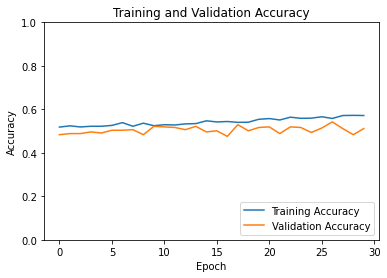

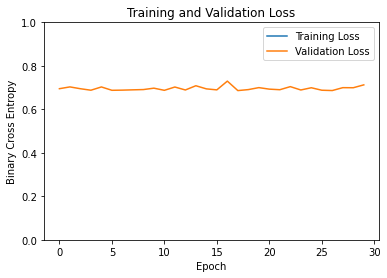

In [33]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plot_accuracy_loss(acc, loss, val_acc, val_loss)

In [23]:
print(test_dataset)

print(val_dataset)

<TakeDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int32)>


NameError: name 'val_dataset' is not defined